In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , MaxPooling2D , Conv2D
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import Adam

In [36]:
import matplotlib.pyplot as plt

In [37]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

In [38]:
x_train = x_train/255.0
x_test = x_test/255.0

In [39]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [40]:
x_train.shape

(50000, 32, 32, 3)

In [41]:
x_test.shape


(10000, 32, 32, 3)

In [42]:
y_test.shape

(10000, 10)

In [43]:
model = Sequential(
    [
        Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation = 'relu'),
        MaxPooling2D((2,2)),
        Conv2D(64 , (3,3),activation = 'relu'),
        Flatten(),
        Dense(64,activation = 'relu'),
        Dense(10 , activation = 'softmax')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [46]:
history = model.fit(x_train , y_train , epochs=5 , batch_size=32 , validation_data=(x_test,y_test) )


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.2997 - loss: 0.2869 - val_accuracy: 0.5044 - val_loss: 0.2158
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.5364 - loss: 0.2064 - val_accuracy: 0.5971 - val_loss: 0.1825
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.6100 - loss: 0.1804 - val_accuracy: 0.6317 - val_loss: 0.1699
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6546 - loss: 0.1625 - val_accuracy: 0.6419 - val_loss: 0.1669
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.6780 - loss: 0.1522 - val_accuracy: 0.6819 - val_loss: 0.1500


In [47]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print("loss - ",test_loss)
print("accuracy - ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6862 - loss: 0.1483
loss -  0.14999522268772125
accuracy -  0.6819000244140625


In [52]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


Actual values ==  1
Predicted value ==  1


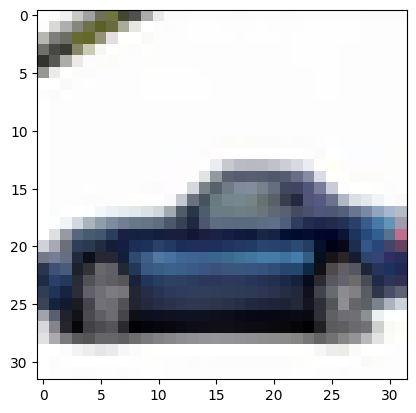

In [54]:
n = 105
plt.imshow(x_test[n])
print("Actual values == " , np.argmax(y_test[n]))
print("Predicted value == " , np.argmax(y_pred[n]))

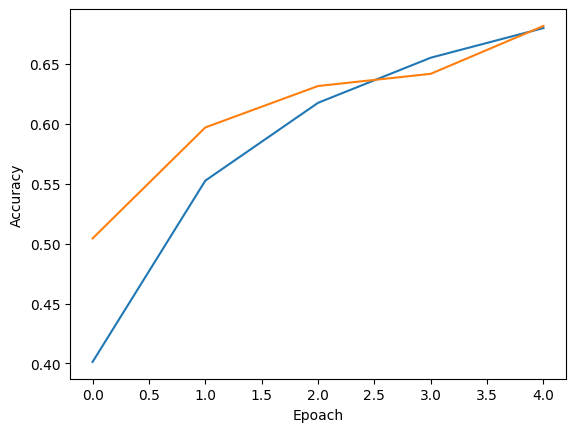

In [56]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoach")
plt.ylabel("Accuracy")
plt.show()

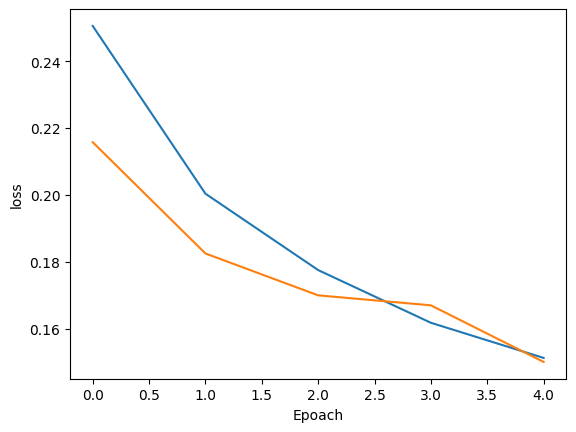

In [61]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoach")
plt.ylabel("loss")
plt.show()